# X-ray image processing

## Introduction

This notebook demonstrates how to read and process X-ray images with `NumPy`, `imageio`, `Matplotlib` and `SciPy` through loading medical images, focusing on certain parts, and visually comparing them using the `Gaussian`, `Laplacian-Gaussian`, `Sobel`, and `Canny` filters for edge detection.

X-ray image analysis can be part of anyone's `data analysis and machine learning workflow`. In the healthcare industry, medical image processing and analysis is particularly important when images are estimated to account for at least 90% of all medical data.

Radiology images from the [`ChestX-ray8`](https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community) dataset provided by the [`National Institutes of Health (NIH)`](https://nih.gov/) is the source of data for this notebook. ChestX-ray8 contains over 100000 de-identified X-ray images in the PNG format from more than 30000 patients. ChestX-ray8’s files can be found on NIH’s public Box repository in the `/images` folder. (For more details, refer to the [`research paper`](https://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf) published at CVPR (a computer vision conference) in 2017.)

## Requirements

* `Python`, `NumPy` arrays, and `Matplotlib`.
* `imageio` for reading and writing image data. The healthcare industry usually works with the `DICOM` format for medical imaging and `imageio` should be well-suited for reading that format. For simplicity, this tutorial will be using simple PNG files.
* `Matplotlib` for data visualization.
* `SciPy` for multi-dimensional image processing via `ndimage`.

#### Examine an X-ray with `imageio`

Let’s begin with a simple example using just one X-ray image from the ChestX-ray8 dataset.

1. Load the image with `imageio`:

In [1]:
!python data/x-ray-data/downloader.py

downloading data/x-ray-data/images_01.tar.gz ...
Uncompressing data/x-ray-data/images_01.tar.gz ...


downloading data/x-ray-data/images_02.tar.gz ...
Uncompressing data/x-ray-data/images_02.tar.gz ...


downloading data/x-ray-data/images_03.tar.gz ...
Uncompressing data/x-ray-data/images_03.tar.gz ...


downloading data/x-ray-data/images_04.tar.gz ...
Uncompressing data/x-ray-data/images_04.tar.gz ...


downloading data/x-ray-data/images_05.tar.gz ...
Uncompressing data/x-ray-data/images_05.tar.gz ...


downloading data/x-ray-data/images_06.tar.gz ...
Uncompressing data/x-ray-data/images_06.tar.gz ...


downloading data/x-ray-data/images_07.tar.gz ...
Uncompressing data/x-ray-data/images_07.tar.gz ...


downloading data/x-ray-data/images_08.tar.gz ...
Uncompressing data/x-ray-data/images_08.tar.gz ...


downloading data/x-ray-data/images_09.tar.gz ...
Uncompressing data/x-ray-data/images_09.tar.gz ...


downloading data/x-ray-data/images_10.tar.gz ...
Uncompressing data/x-ray-data/ima

In [2]:
import os
import imageio
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [3]:
DIR = "data/images"
xray_image = imageio.v2.imread(os.path.join(DIR, "00000011_001.png"))

2. Check that its shape is 1024x1024 pixels and that the array is made up of 8-bit integers:

In [4]:
print(xray_image.shape)
print(xray_image.dtype)

(1024, 1024)
uint8


3. Use `matplotlib` and display the image in a `grayscale` colormap:

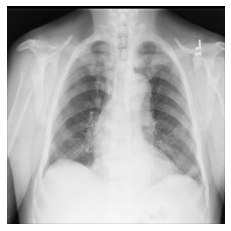

In [5]:
plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

#### Combine images into a multidimensional array to demonstrate progression

In the next example, instead of 1 image, 9 X-ray 1024x1024-pixel images will be used from the ChestX-ray8 dataset that have been downloaded and extracted from the dataset files. They are numbered from ...000.png to ...008.png and let’s assume they belong to the same patient.

1. Use `NumPy` to read in each of the X-rays, and create a three-dimensional array where the first dimension corresponds to image number:

In [6]:
num_imgs = 9
combined_xray_images_1 = np.array(
    [imageio.v2.imread(os.path.join(DIR, f"00000011_00{i}.png")) for i in range(num_imgs)]
)

2. Check the shape of the new X-ray image array containing 9 stacked images:

In [7]:
combined_xray_images_1.shape

(9, 1024, 1024)

Note that the shape in the first dimension matches num_imgs, so the combined_xray_images_1 array can be interpreted as a stack of 2D images.

3. Now display the “health progress” by plotting each of frames next to each other using `Matplotlib`:

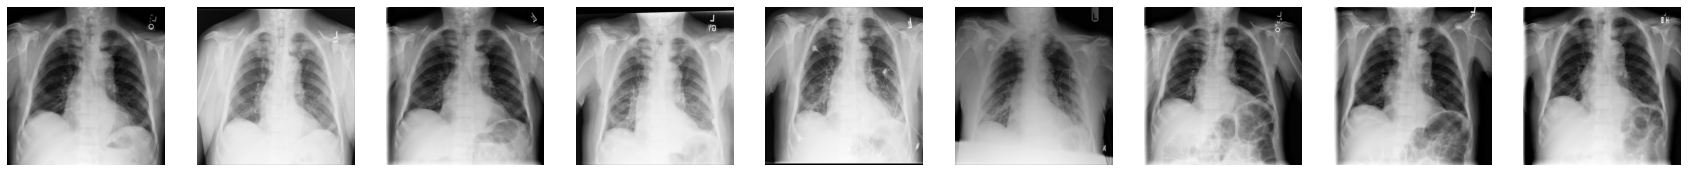

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=num_imgs, figsize=(30, 30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

4. In addition, it can be helpful to show the progress as an animation. Let’s create a GIF file with `imageio.mimwrite()` and display the result in the notebook:

In [9]:
GIF_PATH = os.path.join("data/sample", "xray_image.gif")
imageio.v2.mimwrite(GIF_PATH, combined_xray_images_1, format=".gif", fps=1)

#### Edge detection using the Laplacian-Gaussian, Gaussian gradient, Sobel, and Canny filters

When processing biomedical data, it can be useful to emphasize the 2D "edges" to focus on particular features in an image. To do that, using `image gradients` can be particularly helpful when detecting the change of color pixel intensity.

##### The Laplace filter with Gaussian second derivatives

Let’s start with an `n-dimensional Laplace filter (Laplacian-Gaussian)` that uses `Gaussian second derivatives`. This Laplacian method focuses on pixels with rapid intensity change in values and is combined with Gaussian smoothing to remove noise. Let’s examine how it can be useful in analyzing 2D X-ray images.

* The implementation of the Laplacian-Gaussian filter is relatively straightforward:
    1. use the `ndimage` module from `SciPy`
    2. call `scipy.ndimage.gaussian_laplace()` with a sigma (scalar) parameter, which affects the standard deviations of the Gaussian filter (will be used as 1 in the example below)

In [10]:
xray_image_laplacian_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1)

Display the original X-ray and the one with the Laplacian-Gaussian filter:

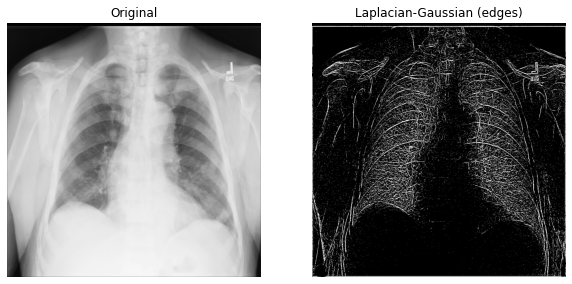

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplacian-Gaussian (edges)")
axes[1].imshow(xray_image_laplacian_gaussian, cmap="gray")

for i in axes:
    i.axis("off")

plt.show()

##### The Gaussian gradient magnitude method

Another method for edge detection that can be useful is the `Gaussian (gradient) filter`. It computes the multidimensional gradient magnitude with Gaussian derivatives and helps by remove `high-frequency image components`.

1. Call `scipy.ndimage.gaussian_gradient_magnitude()` with a sigma (scalar) parameter (for standard deviations; will be used as 2 in the example below):

In [12]:
xray_image_gaussian_gradient = ndimage.gaussian_gradient_magnitude(xray_image, sigma=2)

2. Display the original X-ray and the one with the Gaussian gradient filter:

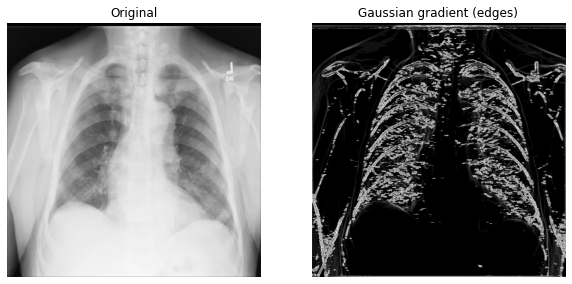

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Gaussian gradient (edges)")
axes[1].imshow(xray_image_gaussian_gradient, cmap="gray")

for i in axes:
    i.axis("off")

plt.show()

##### Sobel-Feldman operator (the Sobel filter)

To find regions of high spatial frequency (the edges or the edge maps) along the horizontal and vertical axes of a 2D X-ray image, the `Sobel-Feldman operator (Sobel filter) technique` can be used. The Sobel filter applies two 3x3 kernel matrices — one for each axis — onto the X-ray through a `convolution`. Then, these two points (gradients) are combined using the `Pythagorean theorem` to produce a gradient magnitude.

1. Use the `Sobel filters — (scipy.ndimage.sobel())` — on x- and y-axes of the X-ray. Then, calculate the distance between x and y (with the Sobel filters applied to them) using the Pythagorean theorem and NumPy's `np.hypot()` to obtain the magnitude. Finally, normalize the rescaled image for the pixel values to be between 0 and 255.

`Image normalization` follows the `output_channel = 255.0 * (input_channel - min_value) / (max_value - min_value)` formula. Because you’re using a grayscale image, you need to normalize just one channel.

In [14]:
x_sobel = ndimage.sobel(xray_image, axis=0)
y_sobel = ndimage.sobel(xray_image, axis=1)

In [15]:
xray_image_sobel = np.hypot(x_sobel, y_sobel)
xray_image_sobel *= 255.0 / np.max(xray_image_sobel)

2. Change the new image array data type to the `32-bit floating-point` format from `float16` to make it compatible with `Matplotlib`:

In [16]:
print("The data type - before: ", xray_image_sobel.dtype)
xray_image_sobel = xray_image_sobel.astype("float32")
print("The data type - after: ", xray_image_sobel.dtype)

The data type - before:  float16
The data type - after:  float32


3. Display the original X-ray and the one with the `Sobel "edge" filter` applied. Note that both the `grayscale` and `CMRmap` colormaps are used to help emphasize the edges:

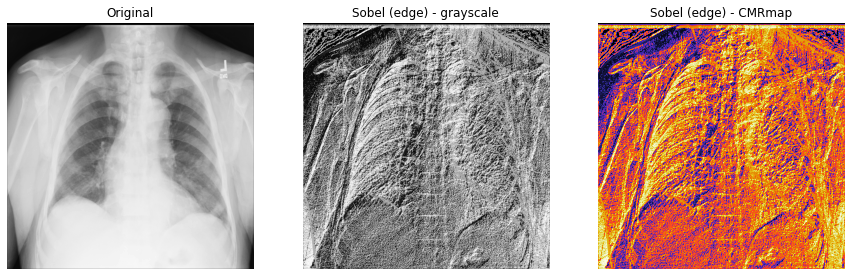

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")

axes[1].set_title("Sobel (edge) - grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")

axes[2].set_title("Sobel (edge) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")

for i in axes:
    i.axis("off")

plt.show()

##### Canny filter

First, a Gaussian filter is applied to remove the noise in an image. In this notebook, the `Fourier filter` is used which smoothens the X-ray through a convolution process.

Next, the `Prewitt filter` is applied on each of the 2 axes of the image to help detect some of the edges — this will result in 2 gradient values. Similar to the `Sobel filter`, the `Prewitt operator` also applies two 3x3 kernel matrices — one for each axis — onto the X-ray through a convolution. In the end, the magnitude between the two gradients is computed using the Pythagorean theorem and normalize the images, as before.

1. Use SciPy's Fourier filters — `scipy.ndimage.fourier_gaussian()` — with a small sigma value to remove some of the noise from the X-ray. Then, calculate two gradients using `scipy.ndimage.prewitt()`. Next, measure the distance between the gradients using NumPy's `np.hypot()`. Finally, `normalize` the rescaled image, as before.

In [18]:
fourier_gaussian = ndimage.fourier_gaussian(xray_image, sigma=0.05)
x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

In [19]:
xray_image_canny = np.hypot(x_prewitt, y_prewitt)
xray_image_canny *= 255.0 / np.max(xray_image_canny)
print("The data type - ", xray_image_canny.dtype)

The data type -  float64


2. Plot the original X-ray image and the ones with the edges detected with the help of the `Canny filter technique`. The edges can be emphasized using the `prism`, `nipy_spectral`, and `terrain` Matplotlib colormaps.

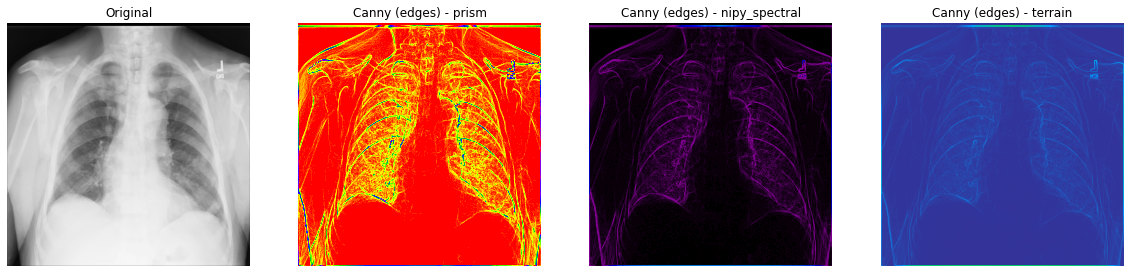

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")

axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap="prism")

axes[2].set_title("Canny (edges) - nipy_spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")

axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")

for i in axes:
    i.axis("off")

plt.show()

#### Apply masks to X-rays with `np.where()`

To screen out only certain pixels in X-ray images to help detect particular features, masks can be applied with NumPy's `np.where(condition: array_like (bool), x: array_like, y: ndarray)` that returns x when `True` and y when `False`.

Identifying regions of interest — certain sets of pixels in an image — can be useful and masks serve as boolean arrays of the same shape as the original image.

1. Retrieve some basic statistics about the pixel values in the original X-ray image you’ve been working with:

In [21]:
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  172.52233219146729
The median pixel value is:  195.0


2. The array data type is uint8 and the minimum/maximum value results suggest that all 256 colors (from 0 to 255) are used in the X-ray. Let’s visualize the `pixel intensity distribution` of the original raw X-ray image with `ndimage.histogram()` and `Matplotlib`:

In [22]:
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256)

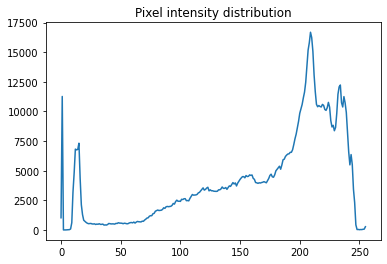

In [23]:
plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

As the pixel intensity distribution suggests, there are many low (between around 0 and 20) and very high (between around 200 and 240) pixel values.

3. Different conditional masks can be created with NumPy's `np.where()` — for example, let’s have only those values of the image with the pixels exceeding a certain threshold:

In [24]:
# The threshold is "greater than 150"
# Return the original image if true, 0 otherwise
xray_image_mask_noisy = np.where(xray_image > 150, xray_image, 0)

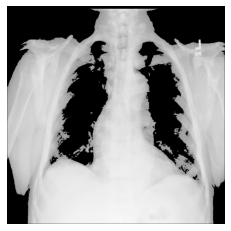

In [25]:
plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

In [26]:
# The threshold is "greater than 150"
# Return 1 if true, 0 otherwise
xray_image_mask_less_noisy = np.where(xray_image > 150, 1, 0)

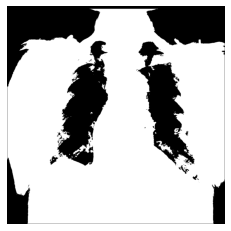

In [27]:
plt.imshow(xray_image_mask_less_noisy, cmap="gray")
plt.axis("off")
plt.show()

#### Compare the results

Let’s display some of the results of processed X-ray images this notebook has worked with so far:

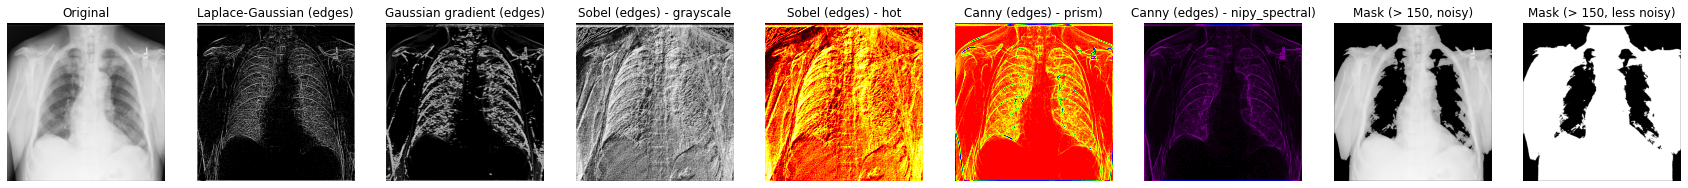

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 30))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")

axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplacian_gaussian, cmap="gray")

axes[2].set_title("Gaussian gradient (edges)")
axes[2].imshow(xray_image_gaussian_gradient, cmap="gray")

axes[3].set_title("Sobel (edges) - grayscale")
axes[3].imshow(xray_image_sobel, cmap="gray")

axes[4].set_title("Sobel (edges) - hot")
axes[4].imshow(xray_image_sobel, cmap="hot")

axes[5].set_title("Canny (edges) - prism)")
axes[5].imshow(xray_image_canny, cmap="prism")

axes[6].set_title("Canny (edges) - nipy_spectral)")
axes[6].imshow(xray_image_canny, cmap="nipy_spectral")

axes[7].set_title("Mask (> 150, noisy)")
axes[7].imshow(xray_image_mask_noisy, cmap="gray")

axes[8].set_title("Mask (> 150, less noisy)")
axes[8].imshow(xray_image_mask_less_noisy, cmap="gray")

for i in axes:
    i.axis("off")

plt.show()